In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from utils import ProgBar, ResultFormarter


In [2]:
constructor = ResultFormarter("MLP_hyperparameters_study")

In [3]:
results_dict = constructor.get_results()

Calculing PDFs...
[--------------------------------------------------] 100.00% - 30 of 30

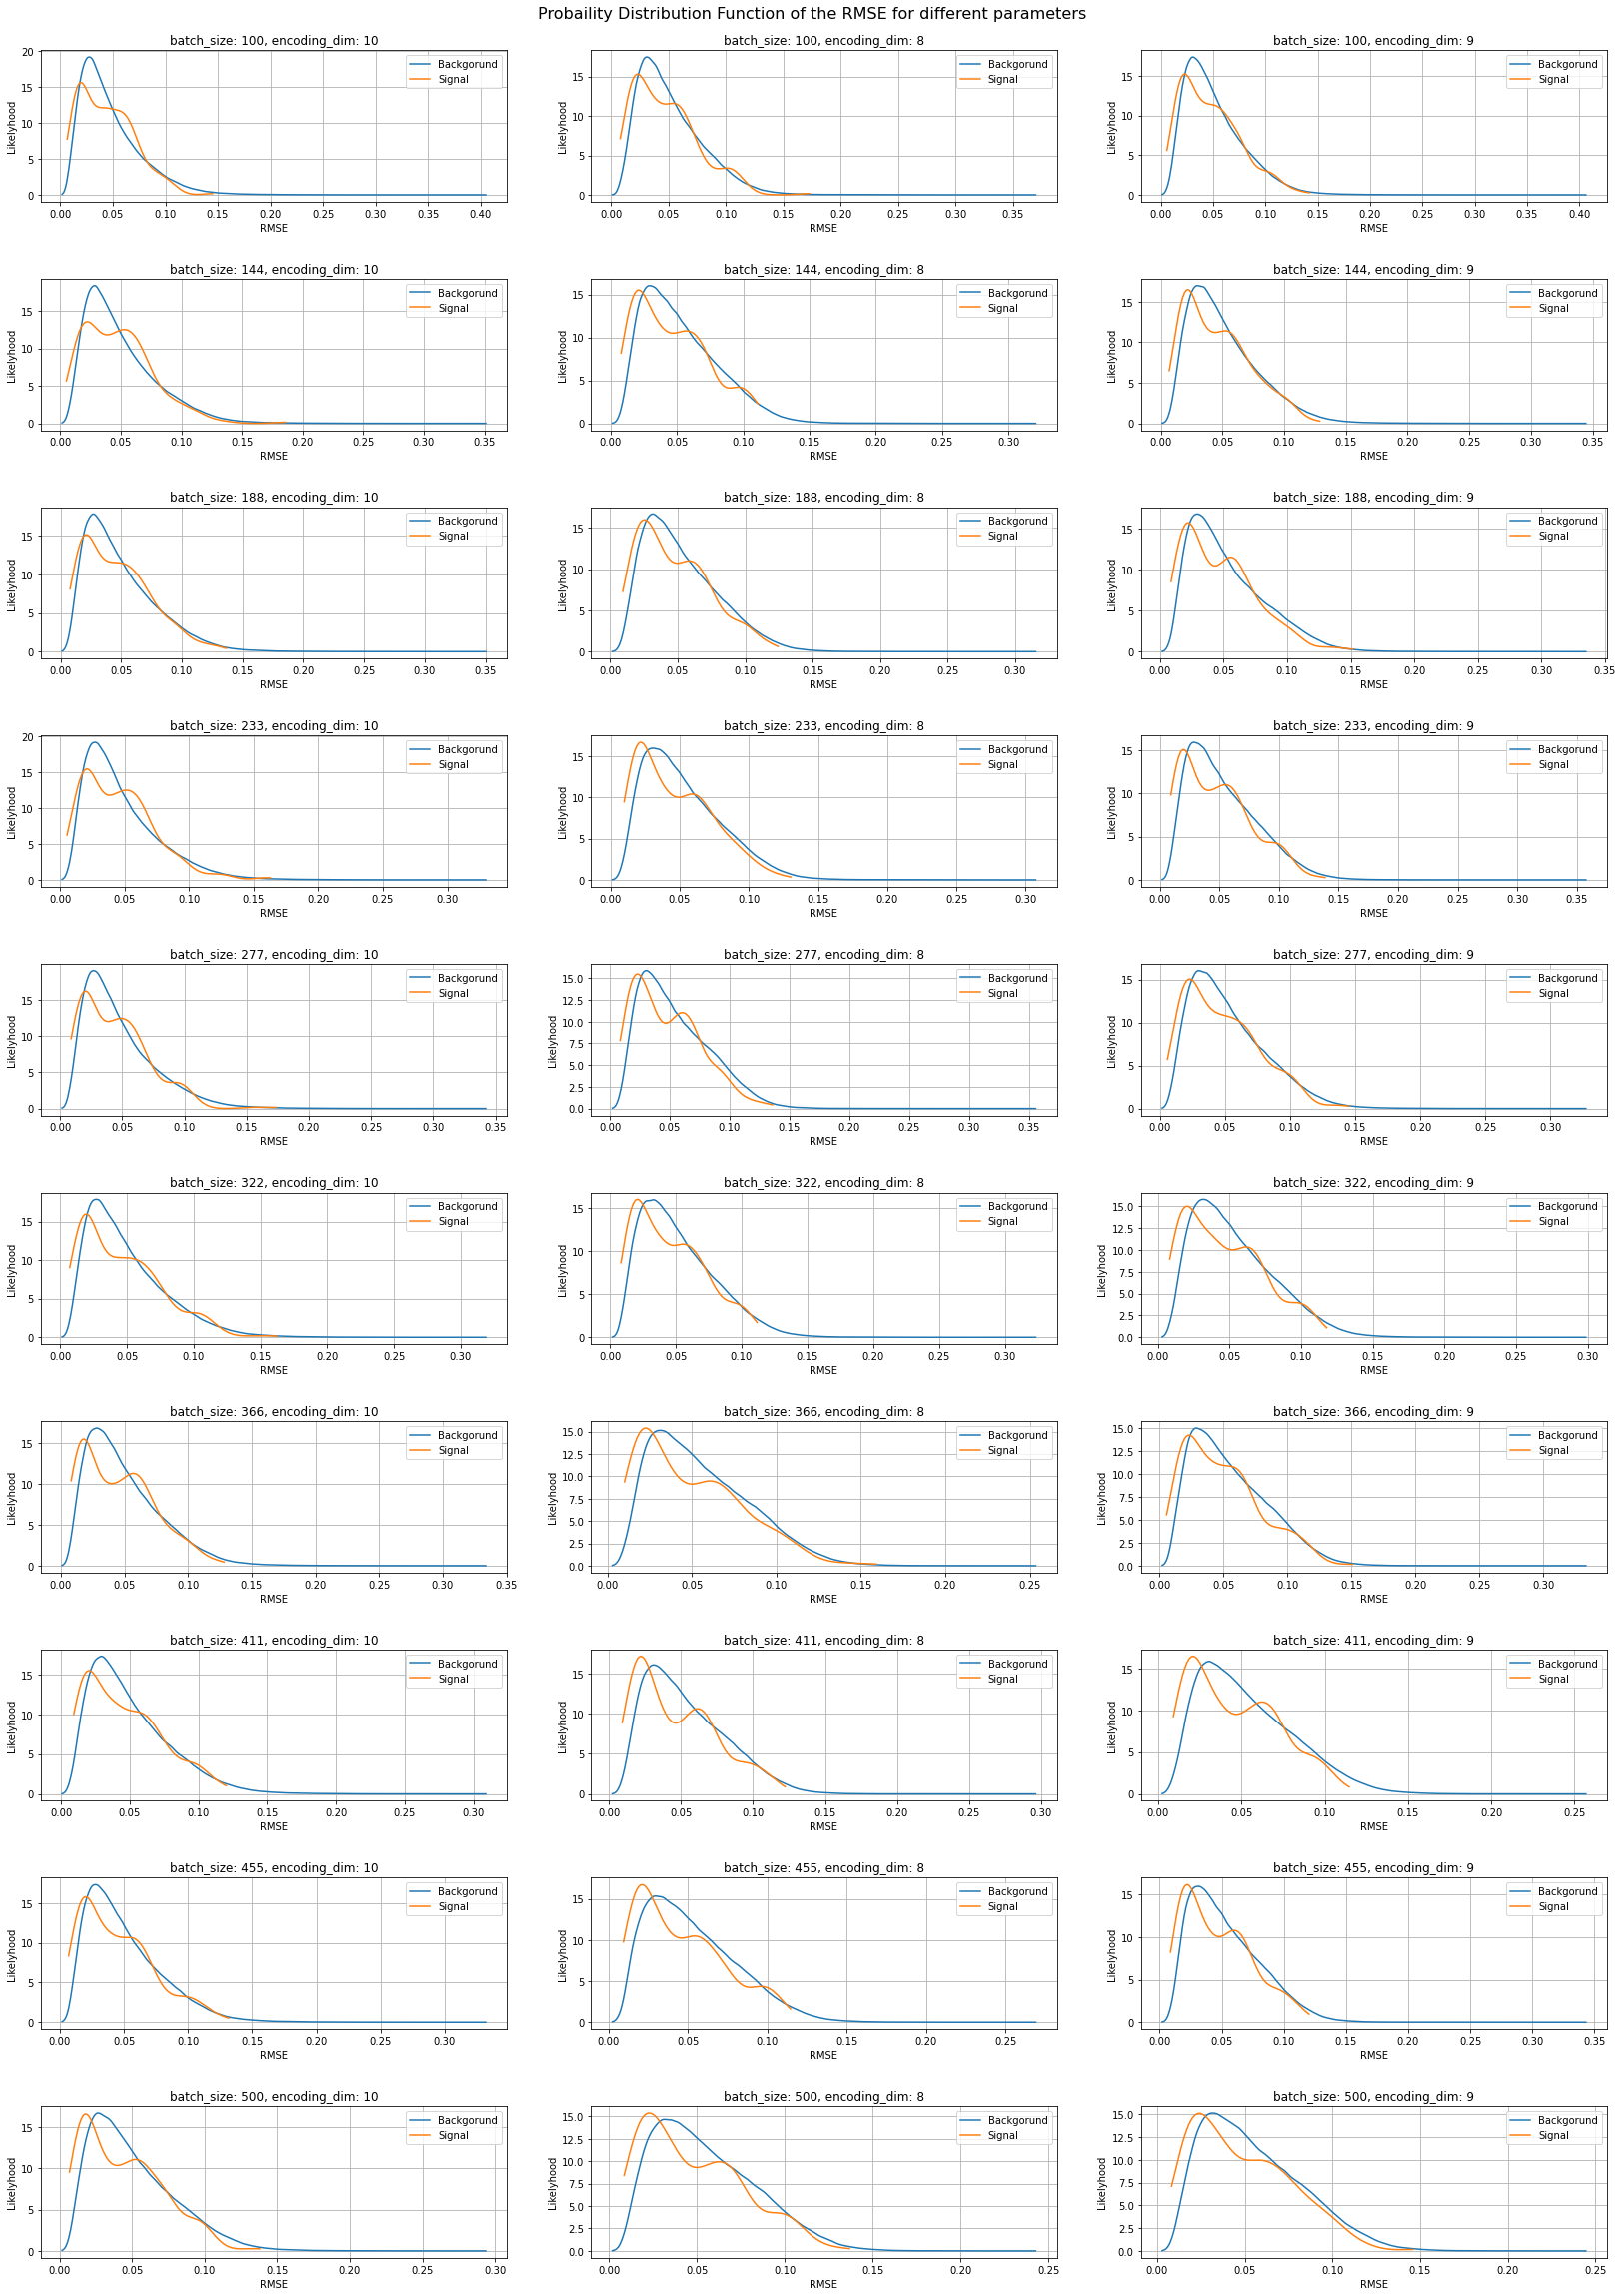

In [51]:
bg_eval_list = []

sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(10,3)

fig.suptitle('Probaility Distribution Function of the RMSE for different parameters', fontsize=16)

bar = ProgBar(30,"Calculing PDFs...")

i = 0

for batch_size in results_dict:
    for encoding_dim in results_dict[batch_size]:

        RMSE = results_dict[batch_size][encoding_dim][:,0]
        Target = results_dict[batch_size][encoding_dim][:,1]

        # getting attributes values

        att_background = RMSE[Target==0]

        att_signal = RMSE[Target==1]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # appending values interval the following analysis

        bg_eval_list.append(bg_eval)

        sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Normal')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Anomaly')

        ax[line,col].legend()
        ax[line,col].set_title("batch_size: " + batch_size + ', ' + 'encoding_dim: ' + encoding_dim)
        ax[line,col].set_xlabel("RMSE")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

        i += 1

        bar.update()

fig.tight_layout(pad=3.0)

plt.savefig('Figures/RMSE-PDF.pdf',format='pdf')

del fig